In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrftools as wrf

import matplotlib
cmap = matplotlib.cm.get_cmap('viridis',)


# df0=pd.read_pickle('dfs/df_run_02_CTRL.pkl')[30:]
# df0['rtpmax']=-df0['rtpmax']
dfw=pd.read_pickle('dfs/df_run_02_land1m.pkl')
# df1n=pd.read_pickle('dfs/df_run_01_CTRL_smcc.pkl')
# df1nn=pd.read_pickle('dfs/df_run_01_CTRL_smcc_smrp.pkl')
# dfd=pd.read_pickle('dfs/df_run_02_dry.pkl')
# dfs=[df0,df1,df2]
# dfs=[df0,dfl,dfd]
# dfs=[dfw,dfd]
# tits=['Wet','Dry']
#
dfs=[dfw]
tits=['Wet']


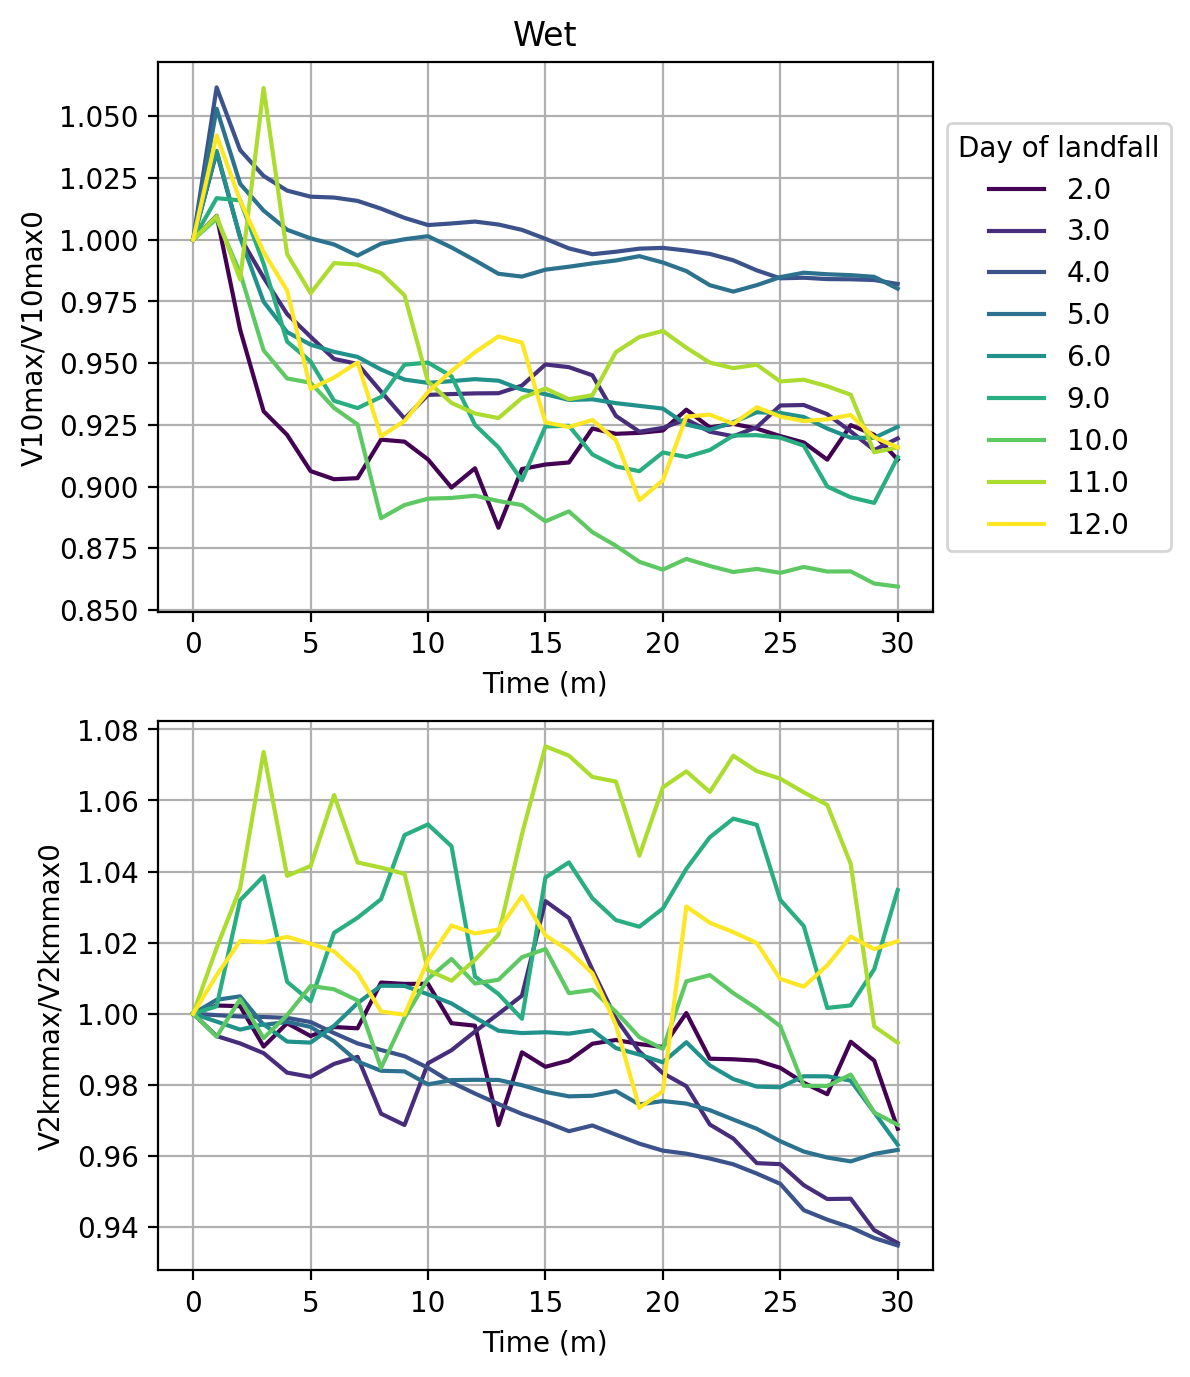

In [101]:
fig,axs=plt.subplots(2,1,dpi=200,figsize=(5,8))
plt.subplots_adjust(wspace=0.3)
# axs=[axs]
for ax,df,tit in zip(axs,dfs,tits):
    df['tal']=df.t-df.tlf
    tlfs=df.tlf.unique()
    plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,len(tlfs))))
    # plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)
    cmap = matplotlib.cm.get_cmap('viridis',len(tlfs))

    for n,tlf in enumerate(tlfs):
        dft=df[df.tlf.eq(tlf)]
        V10=dft.V10max.values
        V10=V10/V10[0]
        
        V2k=dft.V2kmax.values
        V2k=V2k/V2k[0]
        
        t=dft.tal*24
        ax.plot(t*60,V10,color=cmap(n))
        axs[1].plot(t*60,V2k,'-',color=cmap(n))
        
#     ax.set_xlim((0,30))
    ax.grid(True)
    ax.set_xlabel('Time (m)')
    ax.set_ylabel('V10max/V10max0')
    axs[1].set_ylabel('V2kmmax/V2kmmax0')
    axs[1].grid(True)
    axs[1].set_xlabel('Time (m)')
    
    ax.set_title(tit)
    ax.legend((tlfs),loc='center left',\
          bbox_to_anchor=(1, 0.5),ncol=1,title='Day of landfall')